In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq, minimize
np.set_printoptions(threshold=np.inf)
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
%matplotlib inline

In [6]:
def WeightedMean(times,errs):
    
    weights = 1 / errs**2
    weightedMean = np.sum(times * weights)/np.sum(weights)
    weightedErr = np.sqrt(1/np.sum(weights))
    
    return weightedMean,weightedErr

In [143]:
ts = np.array([58496.153954046,58496.153957585,58496.153955762,58496.1539577011,58496.1539564103])
ers = np.array([2.868e-6,1.490e-6,2.238e-6,4.382e-6,1.224e-5])
wm, we = WeightedMean(ts,ers)

In [144]:
print(wm,we)

58496.15395662642 1.0973701584661604e-06


In [36]:
eclipse_times, eclipse_errs  = np.loadtxt('eclipse_times.txt', unpack=True)
eclipse_times, eclipse_errs  = np.loadtxt('weightedtimes.txt', unpack=True)

In [37]:
print(eclipse_times)
print(eclipse_errs)

[57460.65102005 57465.8439817  57768.8352504  57776.9243087
 57802.8892801  57830.1525158  57831.1511474  57832.1498153
 57833.048592   57833.1484576  57833.2483221  57833.3481883
 57834.0472508  58140.2341599  58543.2903687 ]
[1.805e-05 1.642e-05 5.668e-05 9.003e-06 1.519e-05 6.261e-06 4.798e-06
 4.629e-06 2.735e-06 2.741e-06 2.753e-06 2.764e-06 6.091e-06 4.456e-06
 3.202e-06]


In [21]:
low1 = 5
low2 = 8
low3 = 11
low4 = 14
low5 = 17
low6 = 20
low7 = 23
low8 = 26
low9 = 29
low10 = 31
print(eclipse_times[low1:low1+3])
print(WeightedMean(eclipse_times[low1:low1+3],eclipse_errs[low1:low1+3]),'\n')
print(eclipse_times[low2:low2+3])
print(WeightedMean(eclipse_times[low2:low2+3],eclipse_errs[low2:low2+3]),'\n')
print(eclipse_times[low3:low3+3])
print(WeightedMean(eclipse_times[low3:low3+3],eclipse_errs[low3:low3+3]),'\n')
print(eclipse_times[low4:low4+3])
print(WeightedMean(eclipse_times[low4:low4+3],eclipse_errs[low4:low4+3]),'\n')
print(eclipse_times[low5:low5+3])
print(WeightedMean(eclipse_times[low5:low5+3],eclipse_errs[low5:low5+3]),'\n')
print(eclipse_times[low6:low6+3])
print(WeightedMean(eclipse_times[low6:low6+3],eclipse_errs[low6:low6+3]),'\n')
print(eclipse_times[low7:low7+3])
print(WeightedMean(eclipse_times[low7:low7+3],eclipse_errs[low7:low7+3]),'\n')
print(eclipse_times[low8:low8+3])
print(WeightedMean(eclipse_times[low8:low8+3],eclipse_errs[low8:low8+3]),'\n')
print(eclipse_times[low9:low9+2])
print(WeightedMean(eclipse_times[low9:low9+2],eclipse_errs[low9:low9+2]),'\n')
print(eclipse_times[low10:low10+3])
print(WeightedMean(eclipse_times[low10:low10+3],eclipse_errs[low10:low10+3]),'\n')

[57830.15252405 57830.15251802 57830.15250946]
(57830.15251580523, 6.2605894088118755e-06) 

[57831.1511459  57831.15114863 57831.15114461]
(57831.15114743889, 4.7977376524631284e-06) 

[57832.14980206 57832.14981564 57832.14981623]
(57832.149815271354, 4.629286159923417e-06) 

[57833.0485797  57833.04859018 57833.04859838]
(57833.048592003404, 2.734752015525517e-06) 

[57833.14844799 57833.14845566 57833.14846398]
(57833.14845759893, 2.7413038111117117e-06) 

[57833.24831277 57833.24832063 57833.24832726]
(57833.248322142, 2.7531304860981692e-06) 

[57833.34818369 57833.34818647 57833.34819402]
(57833.34818833983, 2.76415085310521e-06) 

[57834.04722602 57834.04725397 57834.0472426 ]
(57834.0472508187, 6.091131470198097e-06) 

[58140.234161   58140.23415655]
(58140.23415986119, 4.455585711225697e-06) 

[58543.29037144 58543.29036826 58543.29036951]
(58543.29036874454, 3.2020480167436154e-06) 



In [38]:
t0 = 57460.65102005
P = 0.09986526674768169

const = np.linspace(0,20000, 20001) * P
primary_eclipses = t0 + const
# print((primary_eclipses - t0))
# print(np.where( (((eclipse_times - t0) % P) < 0.001) | (((eclipse_times - t0) % P) > (P - 0.001)) ))
eclipse_number = []
for e in eclipse_times:
    eclipse_number.append(np.asarray(np.abs(e - primary_eclipses) < 0.01 ).nonzero())

In [40]:
n_eclipse = np.zeros(len(eclipse_number))
i=0
for dummy in eclipse_number:
    n_eclipse[i] = eclipse_number[i][0]
    i+=1

In [57]:
def t_e(t0, P, n):
    return P*n + t0

def chisqr_sum(pars, eclipse_num, times, time_errs):
    (t0, P) = pars
    chi = np.abs((times - t_e(t0, P, eclipse_num)) / time_errs)
    return np.sum(chi)

def chisqr(pars, eclipse_num, times, time_errs):
    (t0, P) = pars
    chi = np.abs((times - t_e(t0, P, eclipse_num)) / time_errs)
    return chi

In [58]:
pars_init = (57460.6, 0.1)
p1 = minimize(chisqr_sum, pars_init, args=(n_eclipse-n_eclipse[0], eclipse_times, eclipse_errs), method='Nelder-mead')
pars_init = (p1.x[0],p1.x[1])
p, cov = leastsq(chisqr, pars_init, args=(n_eclipse-n_eclipse[0], eclipse_times, eclipse_errs), full_output=True, ftol=0.000000000000001)[:2]

In [59]:
print(p1.x)

[5.74606510e+04 9.98652666e-02]


In [60]:
print('T0 = %.8f +- %.8f d' % (p1.x[0],np.sqrt(cov[0,0])))
print('P = %.11f +- %.11f d' % (p1.x[1],np.sqrt(cov[1,1])))
print('T0 = %.8f +- %.8f d' % (p[0],np.sqrt(cov[0,0])))
print('P = %.11f +- %.11f d' % (p[1],np.sqrt(cov[1,1])))

57460.6510096+0.0000005
0.09986526679+0.00000000008

T0 = 57460.65101302 +- 0.00000142 d
P = 0.09986526664 +- 0.00000000028 d
T0 = 57460.65101302 +- 0.00000142 d
P = 0.09986526664 +- 0.00000000028 d


<IPython.core.display.Javascript object>


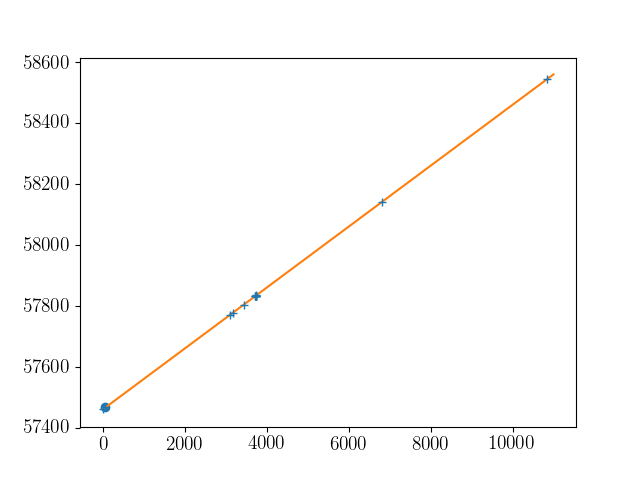

In [69]:
cycle = np.linspace(0,11000,11001)
fig, ax = plt.subplots()
ax.errorbar(n_eclipse-n_eclipse[0], eclipse_times, yerr=eclipse_errs, linewidth=0, elinewidth=1, markersize=6, marker='+')
ax.scatter(52,57465.844)
ax.plot(cycle, t_e(p[0],p[1],cycle))
plt.show()

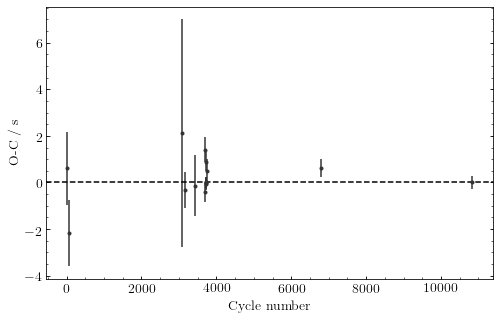

In [163]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 14

majorLocatorx = MultipleLocator(2000)
minorLocatorx = MultipleLocator(500)
majorLocatory = MultipleLocator(2)
minorLocatory = MultipleLocator(0.5)

ax.xaxis.set_major_locator(majorLocatorx)
ax.yaxis.set_major_locator(majorLocatory)

ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)

fig, ax = plt.subplots(figsize=(8,5))

# ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")


majorLocatorx = MultipleLocator(2000)
minorLocatorx = MultipleLocator(500)
majorLocatory = MultipleLocator(2)
minorLocatory = MultipleLocator(0.5)

ax.xaxis.set_major_locator(majorLocatorx)
ax.yaxis.set_major_locator(majorLocatory)

ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)

ax.errorbar(n_eclipse-n_eclipse[0],
            (eclipse_times - t_e(p[0], p[1], n_eclipse-n_eclipse[0]))*24*60*60,
            yerr=eclipse_errs*24*60*60, linewidth=0, elinewidth=1.5, markersize=6, marker='.',color='0.2')
ax.axhline(y=0,xmin=-0.000,xmax=12000,color='k',ls='--')
ax.tick_params(direction='in',which='both',right=True)
ax.set_ylabel('O-C / s')
ax.set_xlabel('Cycle number')

# ax.errorbar(10369-n_eclipse[0],
#             (wm - t_e(p[0], p[1], 10369-n_eclipse[0]))*24*60*60,
#             yerr=we*24*60*60, linewidth=0, elinewidth=1.5, markersize=6, marker='.',color='0.2')

# ax2 = ax.twiny()

# xtick = (np.array([0.,1.,2.,3.]) *365.25)/P

# ax2.set_xlim(ax.get_xlim())
# ax2.set_xticks(xtick)
# ax2.set_xticklabels([0,1,2,3])



# ax2.tick_params(direction='in',which='both')
# ax2.set_xlabel('Time since ephemeris zero-point / yr')

fig.savefig('O-C.pdf', bbox_inches="tight")
# ax.set_ylim([-0.0001,0.0001])
plt.show()

In [97]:
xtick = (np.array([1.,2.,3.]) *365.25)/ P
print(xtick)

[ 3657.42777139  7314.85554278 10972.28331416]
